# Neural network notes

Imagine we want to predict our score on a test (y) based on how many hours we slept and how long we studied (x).
Let's set up some training data.

In [2]:
import numpy as np

# x = (hours slept/hours studied)
X = np.array(([3,5], [5,1], [10,2]), dtype=float)

# y = score on test
y = np.array(([75], [82], [93]), dtype=float)

In [3]:
X

array([[  3.,   5.],
       [  5.,   1.],
       [ 10.,   2.]])

In [4]:
y

array([[ 75.],
       [ 82.],
       [ 93.]])

This is called a __supervised regression__ problem.

* _supervised_: examples have inputs (hours slept/hours studied) and outputs (score)
* _regression_:  we are predicting test score, which is a _continuous_ output

If we were prediciting a letter grade, it would be a __classification__ problem.

Anyway, to solve this problem, we will use an __aritificial neural network__ (ANN).

The first problem we have is that the input is in hours, but the output is a score of 100. To make sure our variables are on the same scale, let's divide each variable by the maximum for each variable.

In [5]:
X = X/np.amax(X, axis=0)
y = y/100 # Max test score is 100

In [6]:
X

array([[ 0.3,  1. ],
       [ 0.5,  0.2],
       [ 1. ,  0.4]])

In [7]:
y

array([[ 0.75],
       [ 0.82],
       [ 0.93]])

 What will our network look like? We'll have 2 inputs -- hours of sleep and hours of study, and 1 output -- $\hat{y}$.
 
We call the output $\hat{y}$ because it's an estimate of y, but not the same as y.

The layers inbetween these inputs and outputs are __hidden layers__.

We'll use 1 hidden layer with 3 neurons.

<img src="images/neuralnet.jpg" alt="" style="width: 400px;"/>

Now, we're going to store all of our inputs in a matrix called X.

Then we'll store all of our weights in a matrix called W<sup>(1)</sup>.

Each element in matrix X gets put into the input neurons, multiplied by the weights connected to that neuron and then summed.

<img src="images/fp1.jpg" alt="" style="width: 400px;"/>

-->

<img src="images/fp2.jpg" alt="" style="width: 400px;"/>

Then we can just multiply all of these together to get the values for our neurons in our hidden layer. We'll call that resulting matrix Z<sup>(2)</sup>. To clarify, this Z matrix is the result of putting through all of our inputs multiplied by our weights.

<img src="images/matricesandweights.jpg" alt="" style="width: 400px;"/>

In Z, every entry is a sum of weighted inputs.
Z is 3x3:

* Row = 1 for each example
* Column = 1 for each hidden unit

In other words, each column is the values for the three examples for each of the neurons in the hidden layer.
Remember, we are putting through all of the data at once.

Anyway, this gives us our first formula:

__Z<sup>(2)</sup> = XW<sup>(1)</sup>__

Now that we have our values for each neuron in the hidden layer, we need to apply our activation function to it.

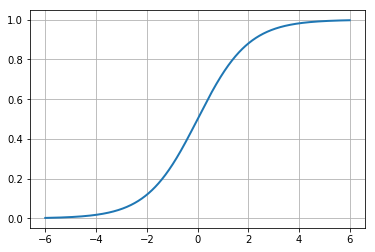

In [8]:
# For our activation function f, we'lluse sigmoid
# Reminder: sigmoid will be close to 0 when -ve, and close to 1 when +ve
%matplotlib inline
import matplotlib.pyplot as plt


def sigmoid(z):
    # Apply sigmoid activation function
    return 1/(1+np.exp(-z))

test_input = np.arange(-6, 6, 0.01)
plt.plot(test_input, sigmoid(test_input), linewidth=2)
plt.grid(1)

This gives us our second forward propagation formula:

__a<sup>(2)</sup> = f(z<sup>(2)</sup>)__, where f is our sigmoid -- acitivation -- function.

a<sup>(2)</sup> will also be a 3x3 matrix -- it's just our matrix Z run through sigmoid.

Now, to get our output, we need to multiply that value by our second layer weights, W<sub>(2)</sub>.

This gives us our third formula:

__Z<sub>(3)</sub> = a<sub>(2)</sub>W<sub>(2)</sub>__

<img src="images/w2.jpg" alt="" style="width: 400px;"/>


W<sub>(2)</sub> is a 3x1 matrix -- one weight for each synapse.

So applying it will give us another 3x1 matrix.

Finally, we'll just apply our activation function to that Z<sub>(3)</sub> matrix to get our official estimate.

So our last formula is:
__$\hat{y}$ = f(z<sub>(3)</sub>)__

In [9]:
# Let's create a neural network class
class Neural_Network(object):
    def __init__(self):
        # Define HyperParameters
        # HyperParameters: Define structure and behaviour of our network
        # but are not updated as we train the network.
        self.inputLayerSize = 2
        self.outputLayerSize = 1
        self.hiddenLayerSize = 3
        
        # Weights (parameters)
        self.W1 = np.random.randn(self.inputLayerSize, \
                                  self.hiddenLayerSize)
        
        self.W2 = np.random.randn(self.hiddenLayerSize, \
                                  self.outputLayerSize)
        
    def forward(self, X):
        # Propagate inputs through the network
        # Sending through all inputs at once in a matrix is more efficient
        self.z2 = np.dot(X, self.W1) # z2 = all inputs * input weights, 3x3 matrix
        self.a2 = self.sigmoid(self.z2) # a2 = z2 squished into 0-1
        self.z3 = np.dot(self.a2, self.W2) # z3 = z2 * output weights
        y_hat = self.sigmoid(self.z3) # y_hat = z3 squished into 0-1
        return y_hat
    
    def sigmoid(self, z):
        # Apply sigmoid activation function
        return 1/(1+np.exp(-z))

In [10]:
network = Neural_Network()

In [11]:
network.W1

array([[-0.20175029, -0.22737057, -0.57701327],
       [ 0.60627812,  0.87224924, -0.00799866]])

In [12]:
network.W2

array([[-0.54778073],
       [ 0.90779693],
       [-0.44196512]])

In [13]:
y_hat = network.forward(X)
y_hat

array([[ 0.51981118],
       [ 0.50046304],
       [ 0.51083826]])

With random weights, this network will obviously __not__ give good results!

We need to train it.

# Gradient Descent
To improve our network, we first need to work out exactly how wrong it is.

We do this by using a __cost function__. The higher the result of the cost function, the more wrong our model is.

One way to compute a cost function is:

1. For every output:
2. Work out the difference between the correct value and our result
3. Square this value
4. Multiply it by 0.5 (why? it will make things simpler apparently)
5. Sum all of these values up

Formally:

$J = \sum \frac{1}{2}(y-\hat{y})^2$

So, we want to minimize this cost function to make the network more accurate.

_Training a network == Minimizing the cost function_

So, how do we minimize the cost function? Well, by changing the weights.
Conceptually, this is quite simple -- there must be some combination of weights that will make our cost function as small as possible.

<img src="images/neural_net_notes/weightchanging.jpg" alt="" style="width: 400px;"/>

Our cost function is an expression in terms of y and $\hat{y}$, and $\hat{y}$ was given by our previous equations. Substituting $\hat{y}$ for the equations in our neural network that gave us $\hat{y}$, we get:

$J = \sum \frac{1}{2}(y-f(XW^{(1)})W^{(2)}))^2$

Now we want to know, what is the rate of change for J with respect to W. I.e., how does J change when we change W, our weights.

Well, remember calculus. This is a derivative. Specifically, since we just consider one weight at a time, it's a partial derivative.

$\frac{dJ}{dW}$

Recall that the gradient of a function consists of a vector with all of it's partial derivatives.

The gradient has another nice property -- it's the slope of steepest ascent.

Therefore, if we take the -ve gradient, we will be going downhill -- descending -- as quickly as possible.

So this is where __gradient descent__ comes in:

1. Compute the gradient of our function
2. Take a small step in the -gradient direction
3. Repeat until we've minimized our function

One issue is that we might hit a local minima instead of a global minima. This is one reason we square our differences in the cost function -- it tends to give us a parabola, which obviously won't have local minima.

Sometimes we can just take our input in batches instead of all at once, and it won't matter if the function is convex or not -- this is stochastic gradient descent (taking input in batches). But for now we'll process all input at once.

# Backpropagation
We have 2 sets of weights -- input weights and output weights.

We'll calculate the derivative of these weights indiviually.

<img src="images/neural_net_notes/weightmatrices.jpg" alt="" style="width: 400px;"/>

Let's take $W^{(2)}$ first:

$\frac{\partial{J}}{\partial{W^{(2)}}} = \frac{\partial{\sum \frac{1}{2}(y-\hat{y})^2}}{\partial{W^{(2)}}}$

(Recall J is the sum of all our error scores.)

We can use the sum rule: the derivative of the sum == the sum of the derivatives.

So move the sum outside, and just worry about the derivative of the inside expression:

$\frac{\partial{J}}{\partial{W^{(2)}}} = \sum \frac{\partial{\frac{1}{2}(y-\hat{y})^2}}{\partial{W^{(2)}}}$

Crunching through the derivative with the power rule and then chain rule, we come to:

$-(y-\hat{y})\frac{\partial{\hat{y}}}{\partial{W^{(2)}}}$

-- We need to take the derivative of $\hat{y}$ with respect to W.

Recall that $\hat{y} = f(Z^{(3)})$ -- y hat is the activation function applied to z3. (z3 was our output from the hidden layer * output weights).

So we apply the chain rule again:

$-(y-\hat{y})\frac{\partial{\hat{y}}}{\partial{Z^{(3)}}}\frac{\partial{Z^{(3)}}}{\partial{W^{(2)}}}$

To differentiate $\hat{y}$ with respect to $Z^{(3)}$, we need need to differentiate our sigmoid function with respect to Z.

In [15]:
def sigmoid_prime(z):
    # Derivative of Sigmoid function
    return np.exp(-z)/((1+np.exp(-z))**2)

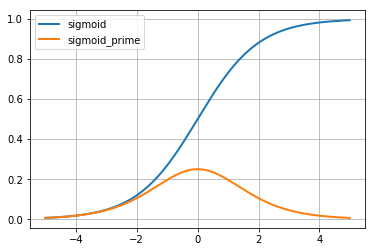

In [20]:
# The derivative will be largest where our function is the steepest
test_values = np.arange(-5, 5, 0.01)

plt.plot(test_values, sigmoid(test_values), linewidth=2)
plt.plot(test_values, sigmoid_prime(test_values), linewidth=2)
plt.grid(1)
plt.legend(['sigmoid', 'sigmoid_prime'])

So we can replace to get:

$-(y-\hat{y})f'({Z^{(3)}})\frac{\partial{Z^{(3)}}}{\partial{W^{(2)}}}$